Importing and Loading Data

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

print("MNIST dataset loaded successfully.")



Loading MNIST dataset...
MNIST dataset loaded successfully.


Filtering and Displaying Dimensions

In [72]:
print(f"Original MNIST X shape: {X.shape}") # (70000, 784)
print(f"Original MNIST y shape: {y.shape}") # (70000,)

# Filter digits 3 and 8
mask = (y == '3') | (y == '8')
X_subset = X[mask]
y_subset = y[mask]

# Display the shape
print(f"\n")
print("Shape of filtered X:", X_subset.shape)
print("Shape of filtered y:", y_subset.shape)
print(f"Unique labels in y_subset: {np.unique(y_subset)}")

Original MNIST X shape: (70000, 784)
Original MNIST y shape: (70000,)


Shape of filtered X: (13966, 784)
Shape of filtered y: (13966,)
Unique labels in y_subset: ['3' '8']


So, there are 13,869 images of size 28×28 = 784 pixels, all either digit 3 or 8.

Visualizing the sample images

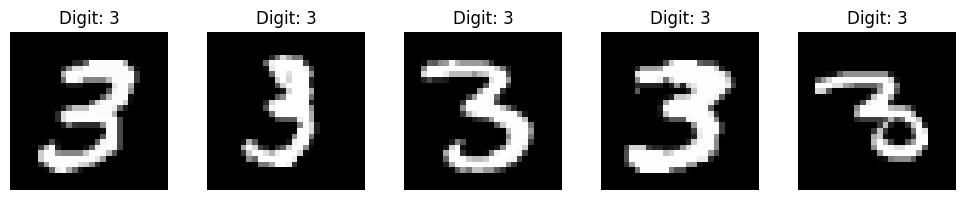

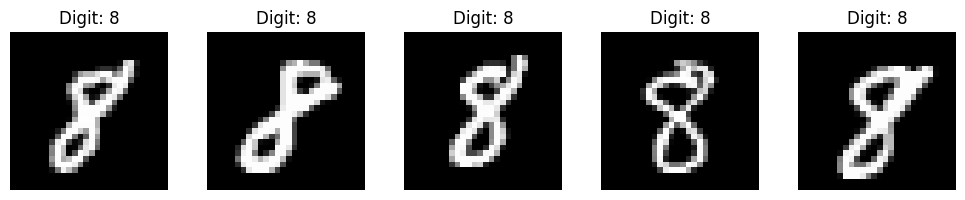

In [73]:
def plot_digits(X, y, digit_label, n=5):
    indices = np.where(y == digit_label)[0][:n]
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f'Digit: {digit_label}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show examples of digit 3
plot_digits(X_subset, y_subset, '3')

# Show examples of digit 8
plot_digits(X_subset, y_subset, '8')

High - Dimensional Data Challenges

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Spliting Data: 70% Train, 30% Test

# Standardize pixel values to 0-1 range
X_subset = X_subset / 255.0

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.3, random_state=42, stratify=y_subset)


PCA With Varying Components 

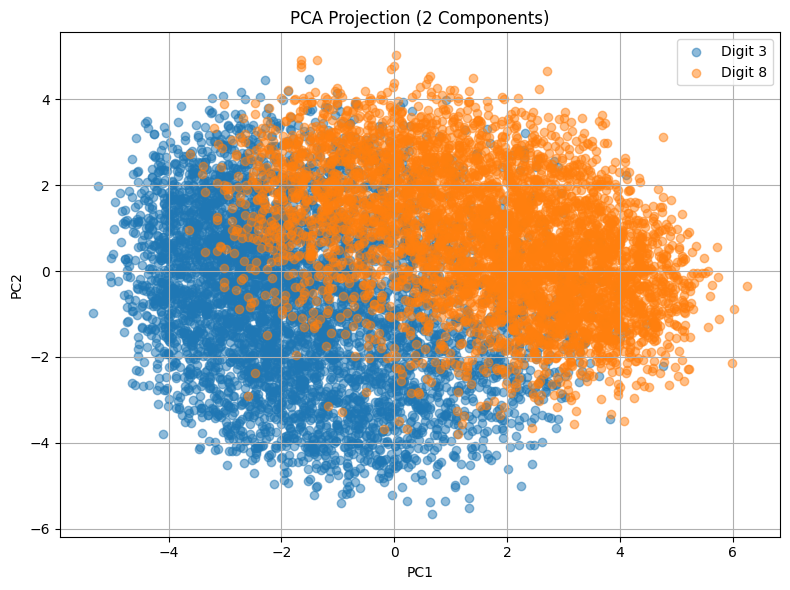

In [75]:
component_list = [2, 5, 10, 20, 30, 50, 75, 100, 200]
explained_variance_ratios = []

for n_components in component_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)

    # Transform both train and test sets
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Store cumulative explained variance ratio
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

    # For visualization, plot the 2D projection if n_components >= 2
    if n_components == 2:
        plt.figure(figsize=(8, 6))
        for label in ['3', '8']:
            idxs = np.where(y_train == label)
            plt.scatter(X_train_pca[idxs, 0], X_train_pca[idxs, 1], label=f'Digit {label}', alpha=0.5)
        plt.title('PCA Projection (2 Components)')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Cummulative Explained Variance

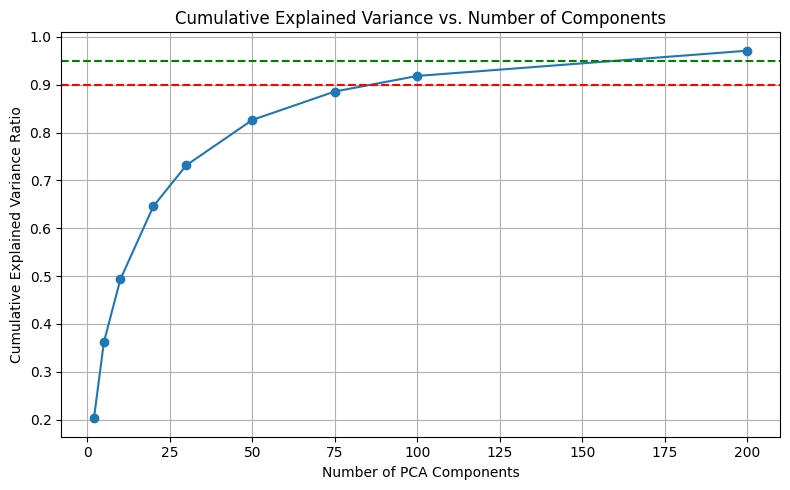

In [76]:
plt.figure(figsize=(8, 5))
plt.plot(component_list, explained_variance_ratios, marker='o')
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


Classification with reduced dimensions:

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

In [78]:
component_list = [2, 5, 10, 20, 30, 50, 75, 100, 200]

accuracies = []
train_times = []
test_times = []
pca_results = {} # To store transformed data

for n_components in component_list:

    print(f"Applying PCA with n_components={n_components}...")
    pca = PCA(n_components=n_components)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf = LogisticRegression(max_iter=1000)

    # Measure training time
    start_train = time.time()
    clf.fit(X_train_pca, y_train)
    end_train = time.time()

    # Measure inference time
    start_test = time.time()
    y_pred = clf.predict(X_test_pca)
    end_test = time.time()

    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)
    train_times.append(end_train - start_train)
    test_times.append(end_test - start_test)

    pca_results[n_components] = {
        'X_train_pca': X_train_pca,
        'X_test_pca': X_test_pca,
        'explained_variance_ratio_sum': pca.explained_variance_ratio_.sum()
    }

    print(f"  Shape of X_train_pca: {X_train_pca.shape}, Explained variance: {pca.explained_variance_ratio_.sum():.4f}")


Applying PCA with n_components=2...
  Shape of X_train_pca: (9776, 2), Explained variance: 0.2026
Applying PCA with n_components=5...
  Shape of X_train_pca: (9776, 5), Explained variance: 0.3615
Applying PCA with n_components=10...
  Shape of X_train_pca: (9776, 10), Explained variance: 0.4929
Applying PCA with n_components=20...
  Shape of X_train_pca: (9776, 20), Explained variance: 0.6459
Applying PCA with n_components=30...
  Shape of X_train_pca: (9776, 30), Explained variance: 0.7317
Applying PCA with n_components=50...
  Shape of X_train_pca: (9776, 50), Explained variance: 0.8263
Applying PCA with n_components=75...
  Shape of X_train_pca: (9776, 75), Explained variance: 0.8857
Applying PCA with n_components=100...
  Shape of X_train_pca: (9776, 100), Explained variance: 0.9183
Applying PCA with n_components=200...
  Shape of X_train_pca: (9776, 200), Explained variance: 0.9710


In [79]:
if X is not None: # Proceed only if data was loaded
    results_list = []

    # --- Baseline: Logistic Regression on original (scaled) data ---
    print("\nTraining baseline Logistic Regression on original scaled data...")
    log_reg_baseline = LogisticRegression(solver='liblinear', random_state=42, max_iter=200) # liblinear is good for binary

    start_time_train = time.time()
    log_reg_baseline.fit(X_train, y_train)
    train_time_baseline = time.time() - start_time_train

    start_time_infer = time.time()
    y_pred_baseline = log_reg_baseline.predict(X_test)
    infer_time_baseline = time.time() - start_time_infer

    accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

    results_list.append({
        'n_components': X_train.shape[1], # Original number of features
        'accuracy': accuracy_baseline,
        'train_time': train_time_baseline,
        'infer_time': infer_time_baseline,
        'type': 'Baseline (Original)'
    })
    print(f"Baseline: Accuracy={accuracy_baseline:.4f}, Train Time={train_time_baseline:.4f}s, Infer Time={infer_time_baseline:.4f}s")

    # --- Logistic Regression on PCA-reduced data ---
    for n_comp in component_list:
        print(f"\nTraining Logistic Regression with n_components={n_comp}...")
        X_train_pca_current = pca_results[n_comp]['X_train_pca']
        X_test_pca_current = pca_results[n_comp]['X_test_pca']

        log_reg_pca = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)

        start_time_train = time.time()
        log_reg_pca.fit(X_train_pca_current, y_train)
        train_time_pca = time.time() - start_time_train

        start_time_infer = time.time()
        y_pred_pca = log_reg_pca.predict(X_test_pca_current)
        infer_time_pca = time.time() - start_time_infer

        accuracy_pca = accuracy_score(y_test, y_pred_pca)

        results_list.append({
            'n_components': n_comp,
            'accuracy': accuracy_pca,
            'train_time': train_time_pca,
            'infer_time': infer_time_pca,
            'type': 'PCA'
        })
        print(f"PCA n={n_comp}: Accuracy={accuracy_pca:.4f}, Train Time={train_time_pca:.4f}s, Infer Time={infer_time_pca:.4f}s, Explained Var: {pca_results[n_comp]['explained_variance_ratio_sum']:.4f}")

    # Convert results to DataFrame for easier plotting
    results_df = pd.DataFrame(results_list)
    results_df_pca_only = results_df[results_df['type'] == 'PCA'].sort_values(by='n_components')


Training baseline Logistic Regression on original scaled data...
Baseline: Accuracy=0.9659, Train Time=0.8170s, Infer Time=0.0050s

Training Logistic Regression with n_components=2...
PCA n=2: Accuracy=0.8566, Train Time=0.0100s, Infer Time=0.0000s, Explained Var: 0.2026

Training Logistic Regression with n_components=5...
PCA n=5: Accuracy=0.8907, Train Time=0.0120s, Infer Time=0.0000s, Explained Var: 0.3615

Training Logistic Regression with n_components=10...
PCA n=10: Accuracy=0.9384, Train Time=0.0170s, Infer Time=0.0000s, Explained Var: 0.4929

Training Logistic Regression with n_components=20...
PCA n=20: Accuracy=0.9484, Train Time=0.0235s, Infer Time=0.0000s, Explained Var: 0.6459

Training Logistic Regression with n_components=30...
PCA n=30: Accuracy=0.9561, Train Time=0.0360s, Infer Time=0.0000s, Explained Var: 0.7317

Training Logistic Regression with n_components=50...
PCA n=50: Accuracy=0.9642, Train Time=0.1016s, Infer Time=0.0000s, Explained Var: 0.8263

Training Logi

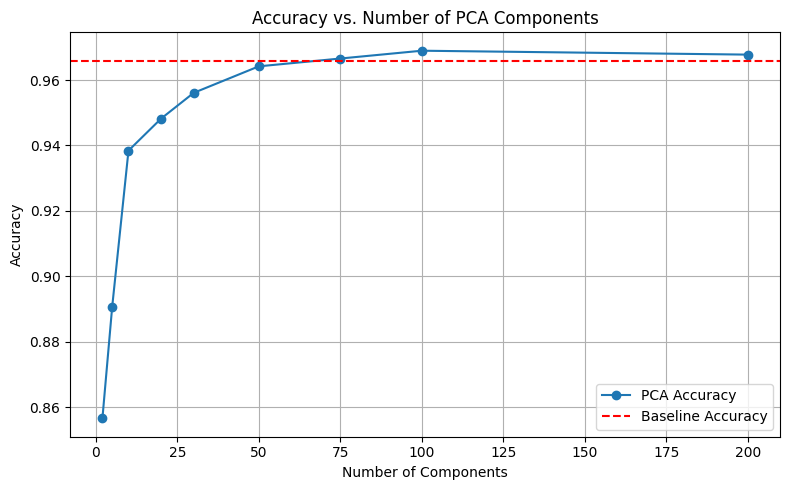

In [80]:
plt.figure(figsize=(8, 5))
plt.plot(component_list, accuracies, marker='o', label='PCA Accuracy')
plt.axhline(accuracy_baseline, color='r', linestyle='--', label='Baseline Accuracy')
plt.title("Accuracy vs. Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


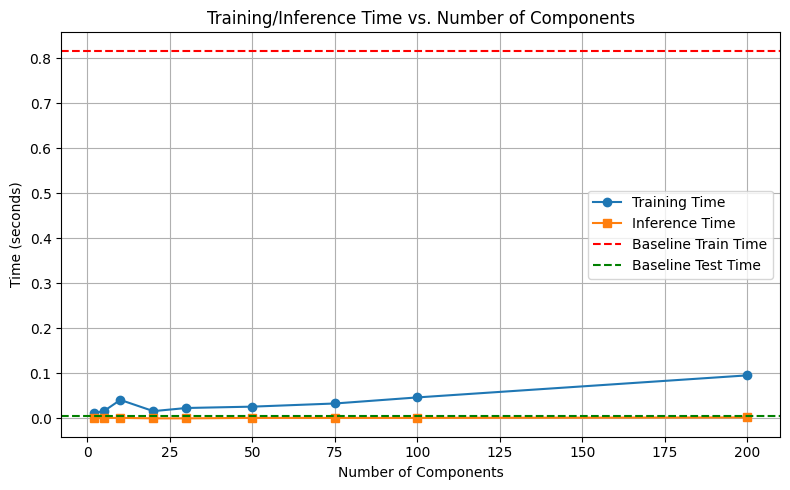

In [81]:
plt.figure(figsize=(8, 5))
plt.plot(component_list, train_times, marker='o', label='Training Time')
plt.plot(component_list, test_times, marker='s', label='Inference Time')
plt.axhline(train_time_baseline, color='r', linestyle='--', label='Baseline Train Time')
plt.axhline(infer_time_baseline, color='g', linestyle='--', label='Baseline Test Time')
plt.title("Training/Inference Time vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
print("\n--- Detailed Results ---")
print(results_df)


--- Detailed Results ---
   n_components  accuracy  train_time  infer_time                 type
0           784  0.965871    0.817033    0.005002  Baseline (Original)
1             2  0.856563    0.010001    0.000000                  PCA
2             5  0.890692    0.012000    0.000000                  PCA
3            10  0.938425    0.016999    0.000000                  PCA
4            20  0.948449    0.023538    0.000000                  PCA
5            30  0.956086    0.036004    0.000000                  PCA
6            50  0.964200    0.101585    0.000000                  PCA
7            75  0.967064    0.155190    0.001006                  PCA
8           100  0.968974    0.246124    0.000997                  PCA
9           200  0.967542    0.595548    0.001028                  PCA
